In [5]:
import torch
# GPU 模式是否支持
torch.cuda.is_available()

True

In [6]:
# 5 x 5 零矩阵
torch.zeros(5,5)
# 5 x 5 元素全为1的矩阵
torch.ones(5,5)
# 5 x 5 单位矩阵
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [7]:
I = torch.eye(5)
# 获取数组形状
print("shape of I is ",I.shape)
# reshape矩阵
print("reshape in place [all_element:1] ",I.view(-1,1).shape)

shape of I istorch.Size([5, 5])
reshape in place [all_element:1]torch.Size([25, 1])


In [8]:
torch.tensor([1,3]).shape
# converted to python scalars
type(torch.tensor(1).item())
type(torch.tensor(1))

torch.Tensor

In [9]:
# 将张量移到gpu
I = torch.eye(5)

B = I.to('cuda')
print(f"I device is :{I.device}, B device is: {B.device}")

I device is :cpu, B device is: cuda:0


In [16]:
 ##  创建 神经网络的方式
 from torch import nn
 model = nn.Sequential(  
              nn.Linear(10, 10),  
              nn.ReLU(),  
              nn.Linear(10, 5),  
              nn.ReLU(),
              nn.Linear(5, 2),  
              nn.Softmax(dim=1)
            )

In [17]:
print(model)
for p in model.parameters():
    print(p.shape)

Sequential(
  (0): Linear(in_features=10, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=2, bias=True)
  (5): Softmax(dim=1)
)
torch.Size([10, 10])
torch.Size([10])
torch.Size([5, 10])
torch.Size([5])
torch.Size([2, 5])
torch.Size([2])


In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
#  常用的示例数据集
torchvision.datasets.__all__

('LSUN',
 'LSUNClass',
 'ImageFolder',
 'DatasetFolder',
 'FakeData',
 'CocoCaptions',
 'CocoDetection',
 'CIFAR10',
 'CIFAR100',
 'EMNIST',
 'FashionMNIST',
 'QMNIST',
 'MNIST',
 'KMNIST',
 'STL10',
 'SVHN',
 'PhotoTour',
 'SEMEION',
 'Omniglot',
 'SBU',
 'Flickr8k',
 'Flickr30k',
 'VOCSegmentation',
 'VOCDetection',
 'Cityscapes',
 'ImageNet',
 'Caltech101',
 'Caltech256',
 'CelebA',
 'SBDataset',
 'VisionDataset',
 'USPS',
 'Kinetics400',
 'HMDB51',
 'UCF101')

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [21]:
data = iter(trainloader)
import matplotlib.pyplot as plt
import numpy as np

6


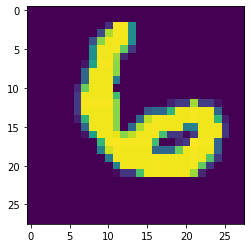

In [22]:
img,label = data.next()
print(label[0].item())
plt.imshow(img[0][0].numpy())
plt.show()

In [23]:
from torch import nn
from torch.nn import functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 784 * 2)
        self.fc2 = nn.Linear(784 * 2, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        input_vector = x.view(-1,784)
        fc1_out = F.relu(self.fc1(input_vector))
        fc2_out = F.relu(self.fc2(fc1_out))
        fc3_out = F.relu(self.fc3(fc2_out))
        output = self.fc4(fc3_out)
        return output

In [27]:
net = Net()
criterion = nn.CrossEntropyLoss()
optim = torch.optim = torch.optim.Adam(net.parameters(),lr=0.001)

In [29]:
net.cuda()

for i in range(2):
    run_loss = 0
    j = 0
    for img,label in trainloader:
        img_gpu,label_gpu = img.to('cuda'), label.to('cuda')
        output = net(img_gpu)
        optim.zero_grad()
        loss = criterion(output, label_gpu)
        loss.backward()
        optim.step()
        run_loss += loss
        j += 1
        if j % 200 == 0:
            print(f"iter is {j},loss is {run_loss/j}")


iter is 200,loss is 0.13608993589878082
iter is 400,loss is 0.12739497423171997
iter is 600,loss is 0.12219467759132385
iter is 800,loss is 0.11658591777086258
iter is 200,loss is 0.06316813826560974
iter is 400,loss is 0.06948794424533844
iter is 600,loss is 0.07205404341220856
iter is 800,loss is 0.07173190265893936


In [33]:
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
net.cpu()
total = 0
correct = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('After Trianing Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))


After Trianing Accuracy of the network on the test images: 98 %


In [ ]:
#  mnist 训练后 准确率提高到了 98%